<a href="https://colab.research.google.com/github/TamiBorges/Controlando-Rotatividade-das-empresas/blob/main/An%C3%BAncios_personalizados_para_clientes_Equipe_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anúncios personalizados para clientes- Equipe de Marketing**

*Neste caso,  recebemos os dados do nosso cliente (um banco), e precisamos descobrir de acordo com os hábitos de cada cliente, os seus interesses, para que a equipe de marketing possa fazer anúncios específicos para cada um, para isso iremos agrupá-los em grupos de interesses.*

## **Importação das bibliotecas e Bases de dados**




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
cartaocredito= pd.read_csv('/content/Marketing_data.csv')

In [3]:
cartaocredito.shape

(8950, 18)

In [4]:
cartaocredito.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cartaocredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cartaocredito.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


*Quando observamos a descrição dos dados mais detalhadamente, conseguimos ter vários insights, percebemos que podemos separar os clientes em grupos de pessoas que sacam mais limite do cartão, pessoas que pagam suas compras com cartão de crédito, e pessoas que usam mais o cartão de débito, além de ser possível vermos um cliente que gastou um valor alto, ou que não paga fatura completa e filtrar para obter mais informações.*




In [7]:
cartaocredito[cartaocredito['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


*No fitro acima podemos observar, por exemplo, que o cliente que possui o maior valor de compra no debido, não utiliza muito o saque do limite, usa pouco parcelamento, seu limite de credito é de 22.5 mil, é cliente há 12 anos e fez 101 transações.* 

In [8]:
cartaocredito[cartaocredito['CASH_ADVANCE'] == 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


*Filtrando o cliente que teve maior valor de saque do limite, podemos fazer comparativo com o cliente anterior, vemos que este não faz muita compra no cartão, fez 123 transações de saque do limite, enquanto o cliente anterior fez apenas 1. Tem um limite de credito menor, e também é cliente há 12 anos.*

## **Visualização e exploração dos dados**

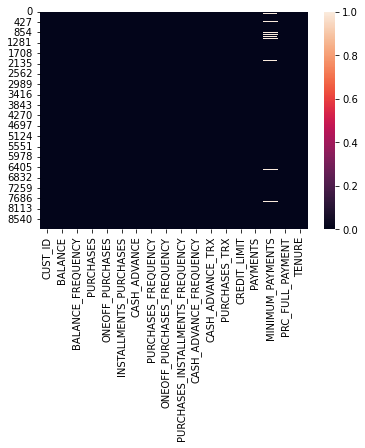

In [9]:
sns.heatmap(cartaocredito.isnull())

*Através do mapa de calor podemos observar que há alguns valores  nulos no atributo minimum_payments (pagamento minimo), anteriormento quando usamos a função info, pudemos observar que para cada atributo havia 8950 pessoas, mas para o atributo minimum_payments e credit_limit haviam valores nulos.*

In [10]:
cartaocredito.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

*Esses valores nulos podem causar erros nos algoritimos, portanto iremos preenche-los fazendo uma média dos valores de pagamento mínimo.*

In [11]:
cartaocredito['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [12]:
cartaocredito.loc[(cartaocredito['MINIMUM_PAYMENTS'].isnull()== True), 'MINIMUM_PAYMENTS']= cartaocredito['MINIMUM_PAYMENTS'].mean()

In [13]:
cartaocredito['CREDIT_LIMIT'].mean()

4494.449450364621

In [14]:
cartaocredito.loc[(cartaocredito['CREDIT_LIMIT'].isnull()== True), 'CREDIT_LIMIT']= cartaocredito['CREDIT_LIMIT'].mean()

In [15]:
cartaocredito.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

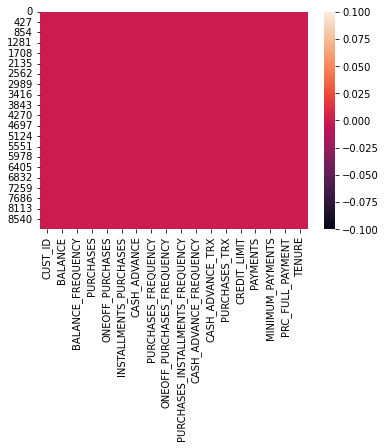

In [16]:
sns.heatmap(cartaocredito.isnull())

*Outro tratamento que podemos fazer é verificar os valores duplicados*

In [17]:
cartaocredito.duplicated().sum()


0

*Podemos apagar atributos que não são importantes para nossa análise, como por exemplo o CUST_ID que é apenas a identificador dos clientes.*

In [18]:
cartaocredito.drop('CUST_ID', axis=1 ,inplace= True)

In [19]:
cartaocredito.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


*Para melhor compreensão dos dados, iremos criar gráficos para cada atributo*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

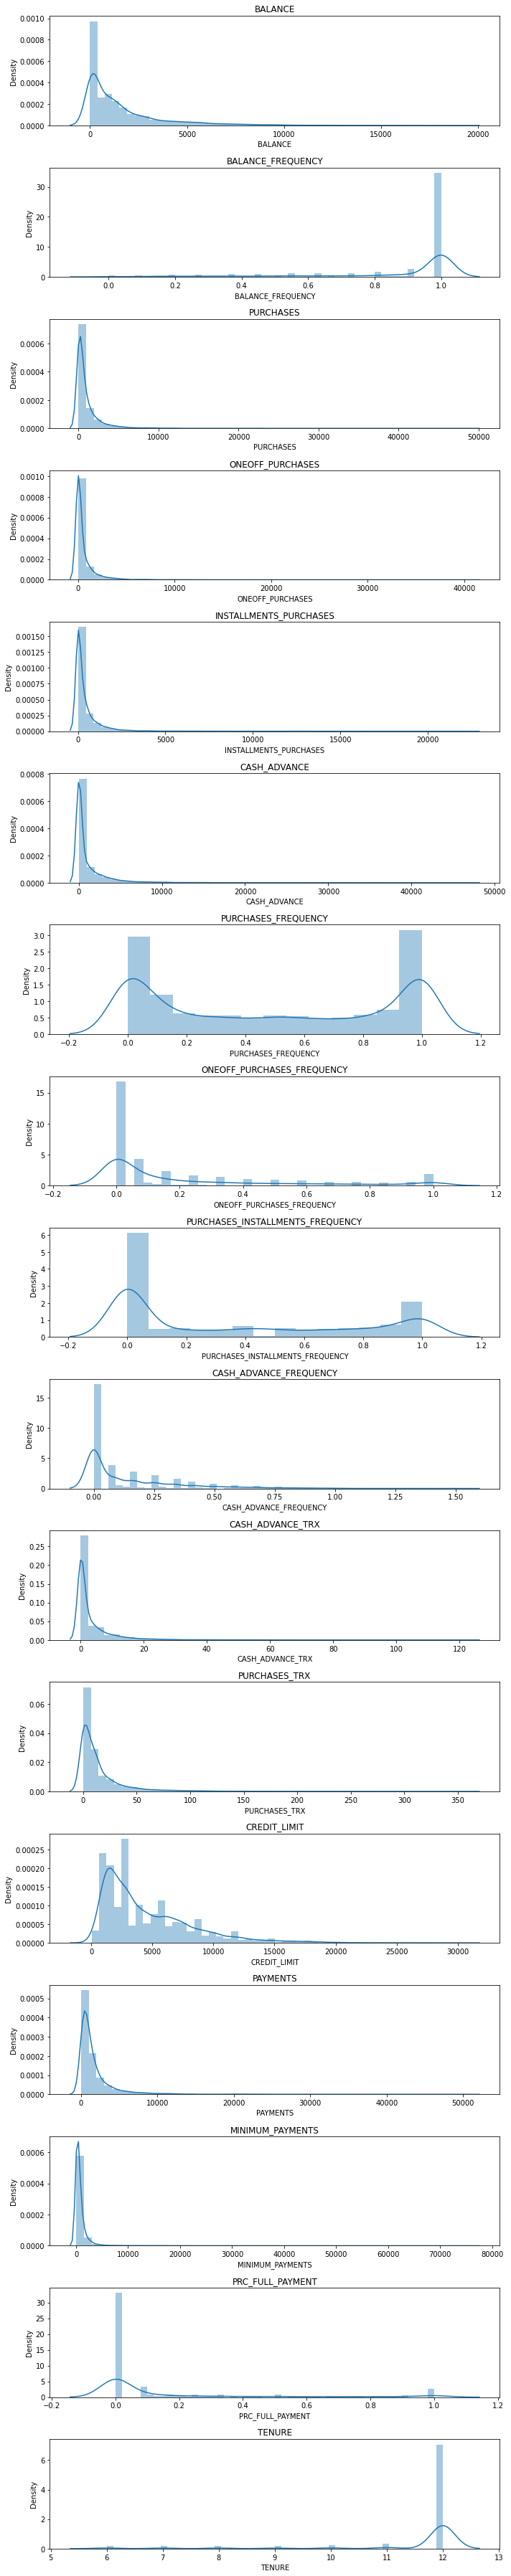

In [64]:
plt.figure(figsize= (10,50))
for i in range(len(cartaocredito.columns)):
  plt.subplot(17,1, i+1)
  sns.distplot(cartaocredito[cartaocredito.columns[i]], kde= True)
  plt.title(cartaocredito.columns[i])
plt.tight_layout();

In [21]:
correlação= cartaocredito.corr()

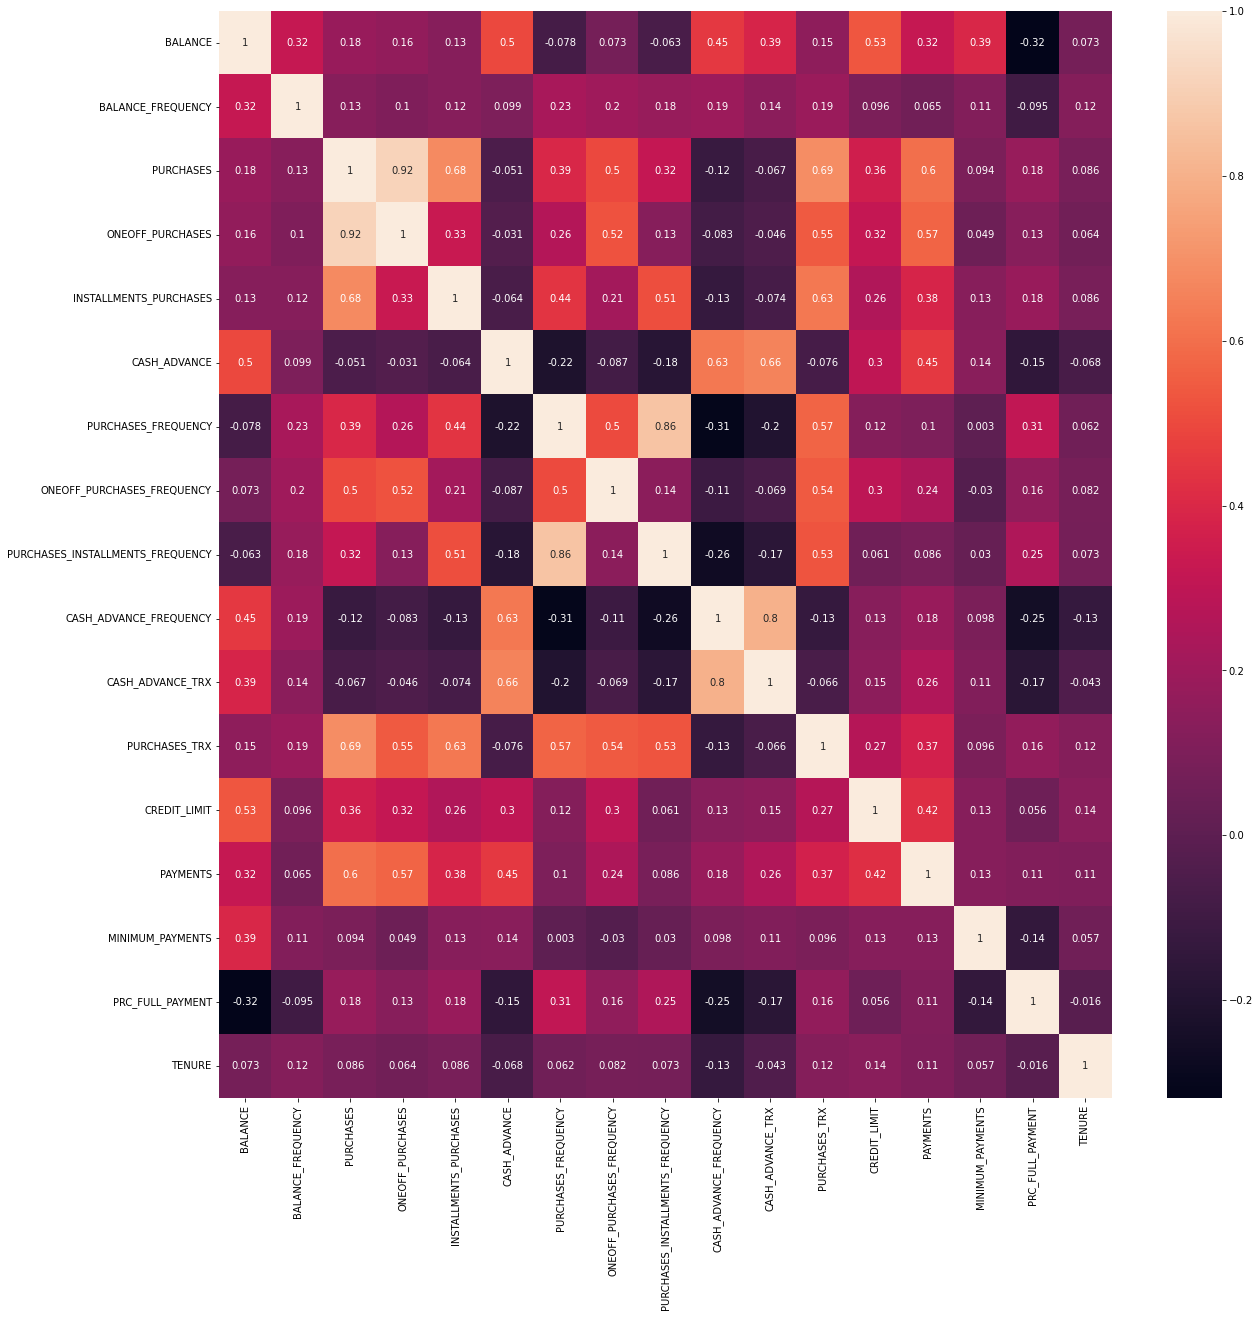

In [22]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(correlação, annot= True);

*Criando a matriz de correlação (com valores de 0 á 1, quanto mais próximo a 1 mais correlação há) é possível identificar quais atributos se correlacionam, assim tendo vários insights. Por exemplo, acima encontramos o valor de 0,92 nos atributos PURCHASES (valor total de compra) e ONEOFF_PURCHASES (valor total de compra á vista), que nos mostra que a grande maioria das compras são pagas á vista.*

## **Definição do número de clusters usando o Elbow Method**

*K_means é um algoritimo de agrupamento, os registros são agrupados por similaridade dos atributos, para utilizá-lo precisamos*
*inicialmente definir o número de clusters, procurando o min e max de cada coluna.*
*As escalas dos atributos são diferentes, por exemplo BALANCE de um cliente 40.000, o BALANCE_FREQUENCY é 0,81 porque neste atributo
*é apenas de 0 á 1, portanto para o k_means que calcula as distancias precisaremos ajustar as escalas, para que o algoritmo 
não considere um atributo mais importante que o outro *texto em itálico*


In [23]:
min(cartaocredito['BALANCE']), max (cartaocredito['BALANCE'])

(0.0, 19043.13856)

In [24]:
escala= StandardScaler()
cartaocreditoescala= escala.fit_transform(cartaocredito)
cartaocreditoescala

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [25]:
wcss_1=[]
range_values= range(1,20)
for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(cartaocreditoescala)
  wcss_1.append(kmeans.inertia_)


In [26]:
print(wcss_1)

[152149.99999999983, 127784.97295116563, 111986.64440741186, 99073.93826774803, 91501.99162496821, 84852.59400226288, 79532.74481840568, 74493.36924483007, 69879.59745728417, 66962.50982740706, 63654.12954959437, 61357.26580196477, 59151.09854429567, 57460.10301853859, 55906.83291052023, 54268.96888089551, 53278.882580298894, 52041.5929707064, 50915.006095898614]


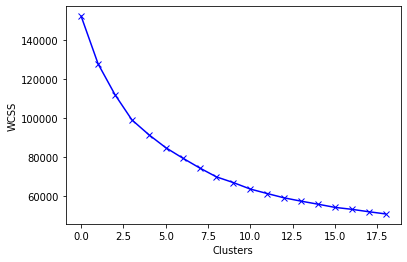

In [27]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

*Após ajustarmos as escalas, faremos o teste com 20 clusters, para verificar o número de clusters que utilizaremos, no grafico acima vemos que o ponto onde os valores diminuem a queda e começam a ficar mais linear é a partir do 8º cluster*

## **Agrupamento com k_means**

In [28]:
kmeans= KMeans(n_clusters=8)
kmeans.fit(cartaocreditoescala)
labels= kmeans.labels_

In [29]:
labels, len(labels)

(array([2, 3, 0, ..., 5, 5, 5], dtype=int32), 8950)

In [30]:
np.unique(labels, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1123, 1186, 2767,  881,   23,  625,  330, 2015]))

In [31]:
kmeans.cluster_centers_

array([[-1.22427718e-01,  4.02972220e-01,  5.64104258e-01,
         6.83812742e-01,  7.73295611e-02, -3.32417534e-01,
         9.97806591e-01,  1.91296190e+00,  2.14058526e-01,
        -4.16854599e-01, -3.33194030e-01,  6.58784271e-01,
         4.63326435e-01,  1.62640306e-01, -1.56144902e-01,
         4.58727359e-01,  2.74023564e-01],
       [-7.00959067e-01, -2.13679607e+00, -3.09924676e-01,
        -2.34454699e-01, -3.01963665e-01, -3.22637706e-01,
        -5.53187327e-01, -4.40411066e-01, -4.38929730e-01,
        -5.21625395e-01, -3.76608255e-01, -4.18251695e-01,
        -1.74982802e-01, -2.02268565e-01, -2.56828957e-01,
         2.83361087e-01,  1.99386337e-01],
       [ 8.31923373e-03,  4.04758405e-01, -3.54559974e-01,
        -2.39274378e-01, -3.98653911e-01, -9.92380219e-02,
        -8.42184730e-01, -3.84578666e-01, -7.51071091e-01,
         9.45883612e-02, -3.43974339e-02, -4.78209275e-01,
        -3.05633384e-01, -2.52007860e-01, -1.29293577e-02,
        -4.54942911e-01,  2.7

In [32]:
centroides= pd.DataFrame(data= kmeans.cluster_centers_, columns=[cartaocredito.columns])
centroides

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.122428,0.402972,0.564104,0.683813,0.077330,-0.332418,0.997807,1.912962,0.214059,-0.416855,-0.333194,0.658784,0.463326,0.162640,-0.156145,0.458727,0.274024
1,-0.700959,-2.136796,-0.309925,-0.234455,-0.301964,-0.322638,-0.553187,-0.440411,-0.438930,-0.521625,-0.376608,-0.418252,-0.174983,-0.202269,-0.256829,0.283361,0.199386
2,0.008319,0.404758,-0.354560,-0.239274,-0.398654,-0.099238,-0.842185,-0.384579,-0.751071,0.094588,-0.034397,-0.478209,-0.305633,-0.252008,-0.012929,-0.454943,0.274563
3,1.673952,0.390676,-0.220295,-0.156602,-0.233247,1.997835,-0.479816,-0.210838,-0.420704,1.909771,1.915410,-0.269489,1.015585,0.813735,0.548554,-0.391364,0.071452
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
6,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
7,-0.357965,0.332433,-0.029606,-0.240593,0.371813,-0.362520,0.997057,-0.380677,1.208315,-0.471903,-0.359553,0.195249,-0.259534,-0.213084,-0.029779,0.313067,0.255413


*Então criamos a variavel para agrupamento em 8 clusters, encontramos os centróides (média) dos valores, e criamos um data frame para visualizar os dados, como fizemos os ajustes das escalas anteriormente, agora não fica claro para análise dos dados, portanto teremos que fazer o processo inverso, para que cada dados volte a ter sua escala original.*

In [33]:
centroides= escala.inverse_transform(centroides)
centroides= pd.DataFrame(data= centroides, columns=[cartaocredito.columns])
centroides

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1309.651867,0.972731,2208.422275,1727.426467,480.995807,281.776015,0.890819,0.773131,0.449510,0.051727,0.975022,31.084746,6180.220582,2203.971601,500.317435,0.287885,11.884032
1,105.487697,0.371083,341.045987,203.290590,138.005649,302.284771,0.268330,0.071075,0.189995,0.030762,0.678752,4.313659,3857.790425,1147.596176,265.677493,0.236593,11.784148
2,1581.790610,0.973154,245.681983,195.290910,50.569859,770.764345,0.152341,0.087730,0.065942,0.154072,3.014090,2.823338,3382.430154,1003.605789,834.075220,0.020652,11.884754
3,5048.665508,0.969818,532.540908,332.510624,200.145687,5168.424082,0.297777,0.139560,0.197239,0.517309,16.320091,8.011351,8189.562481,4088.827136,2142.587532,0.039248,11.612940
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
6,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
7,819.401487,0.956021,939.952078,193.102063,747.293110,218.649226,0.890518,0.088894,0.844653,0.040712,0.795139,19.562996,3550.158830,1116.287417,794.807299,0.245281,11.859127


No Data Frame acima conseguimos visualizar os grupos separados em cada linha, e as médias dos valores para cada atributo. Segue algumas observações posssíveis:

*  Grupo 0- Possui uma média de ONEOFF_PURCHASES (compras no débito) muito maior que de INSTALLMENTS_PURCHASES (compras parceladas) , portanto esse grupo utiliza mais o cartão de débito para pagamento das suas compras, assim o marketing pode oferecer mais opções de compras no debito e credito;

*  Grupo 2- Apresenta a maior média no atributo CASH_ADVANCE (saque do limite), sabendo disso, o banco poderia liberar mais limite de saque para esse grupo;

*  Grupo 4- Tem a maior média no INSTALLMENTS_PURCHASES (compras parceladas), sabendo issoo banco poderia aumentar o limite do cartão de crédito desse grupo. 







*Criaremos agora um novo Data Frame onde será adicionada um coluna para o atributo Clusters, ou seja, o número de qual grupo o cliente faz parte, iremos concatenar nosso Data Frame original, com os labels*

In [34]:
cartaocreditocluster= pd.concat([cartaocredito, pd.DataFrame({'CLUSTER': labels})], axis=1)
cartaocreditocluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


*Com este novo dado no data frame, podemos analisar por exemplo, o cliente 1 pertence ao grupo 5, neste grupo os clientes tendem a gastar valores muito altos do limite CASH_ADVANCE, a equipe de marketing então poderia enviar a este cliente especificamente, limites mais altos para que o mesmo gaste mais ainda, e o banco possa lucrar, pois estes juros são altíssimos.*

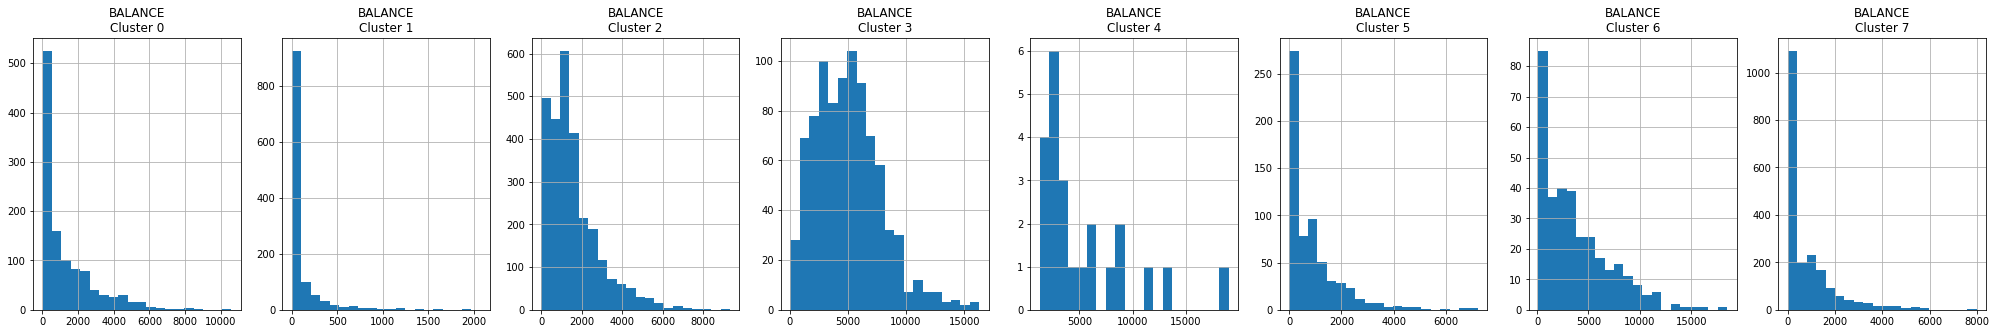

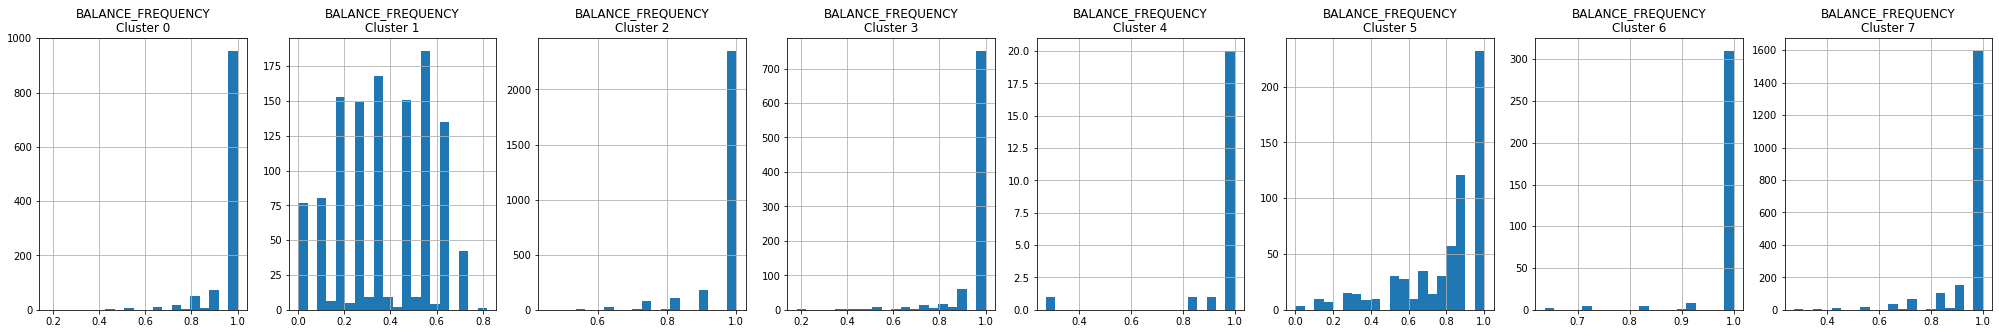

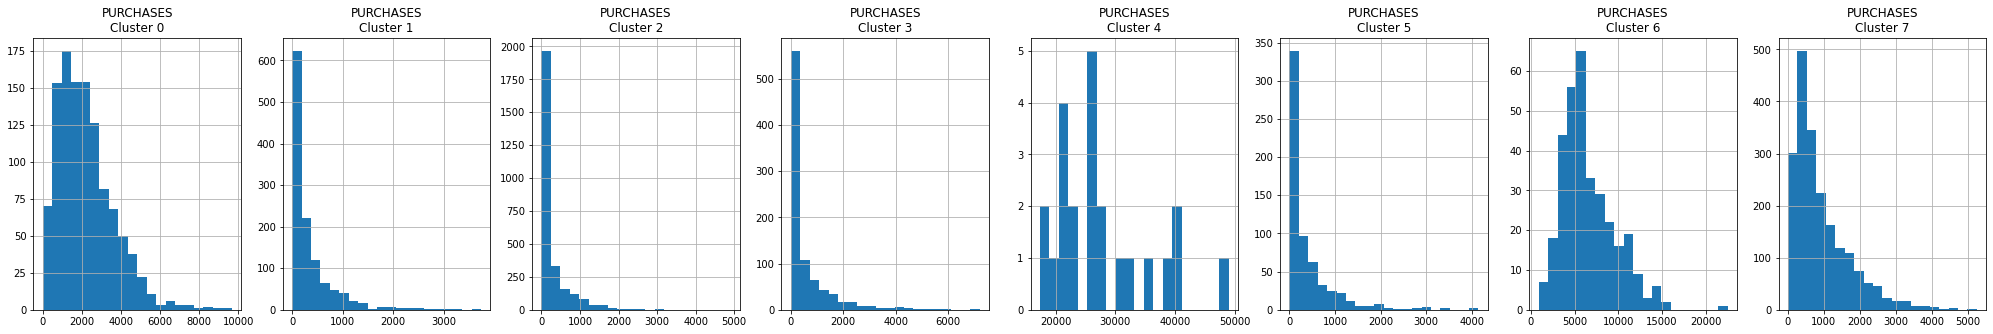

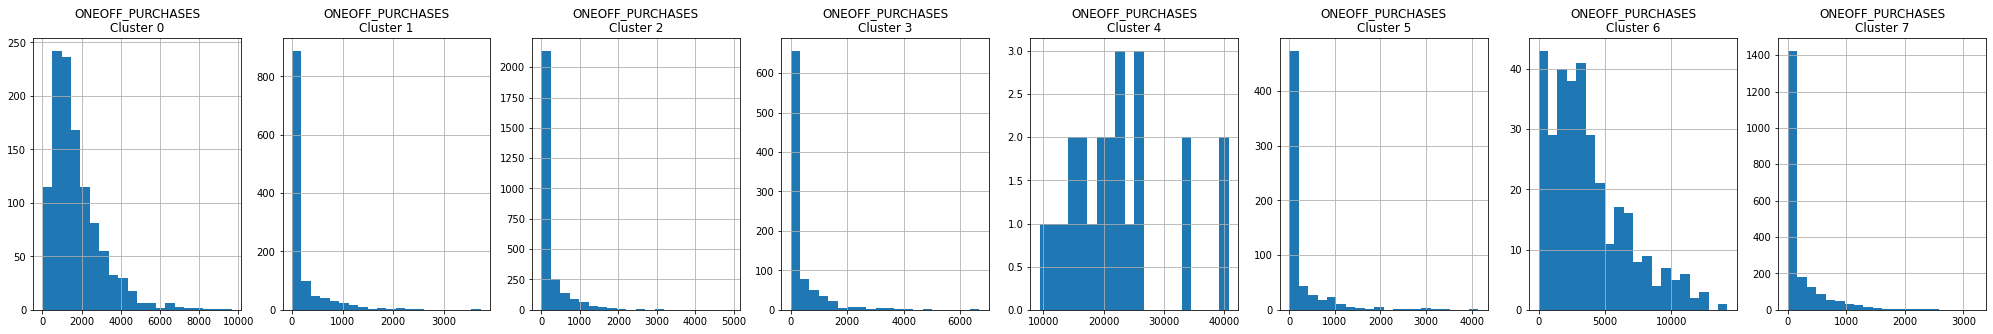

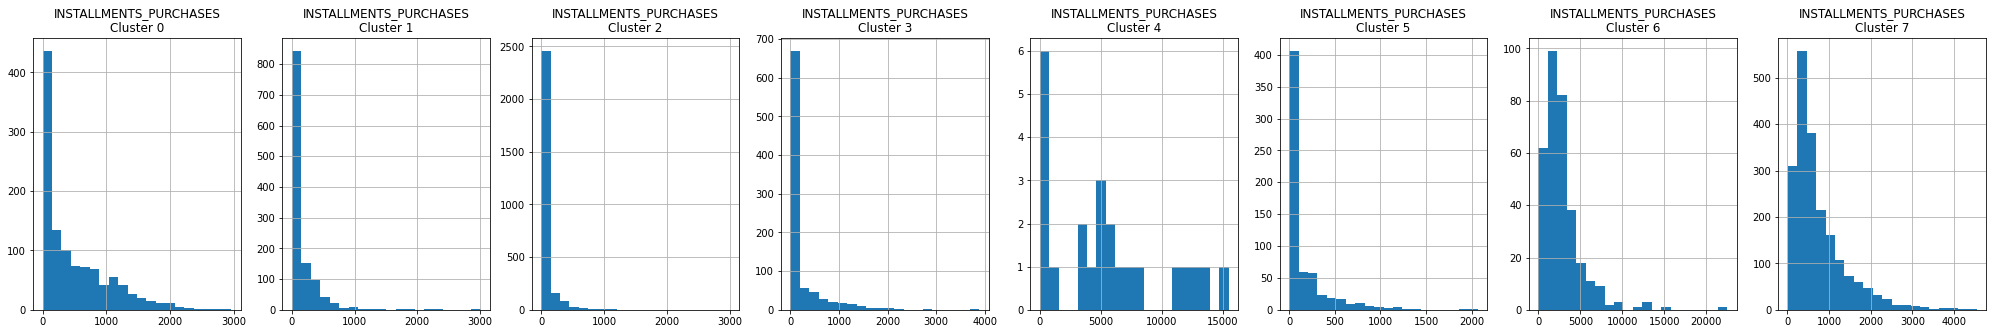

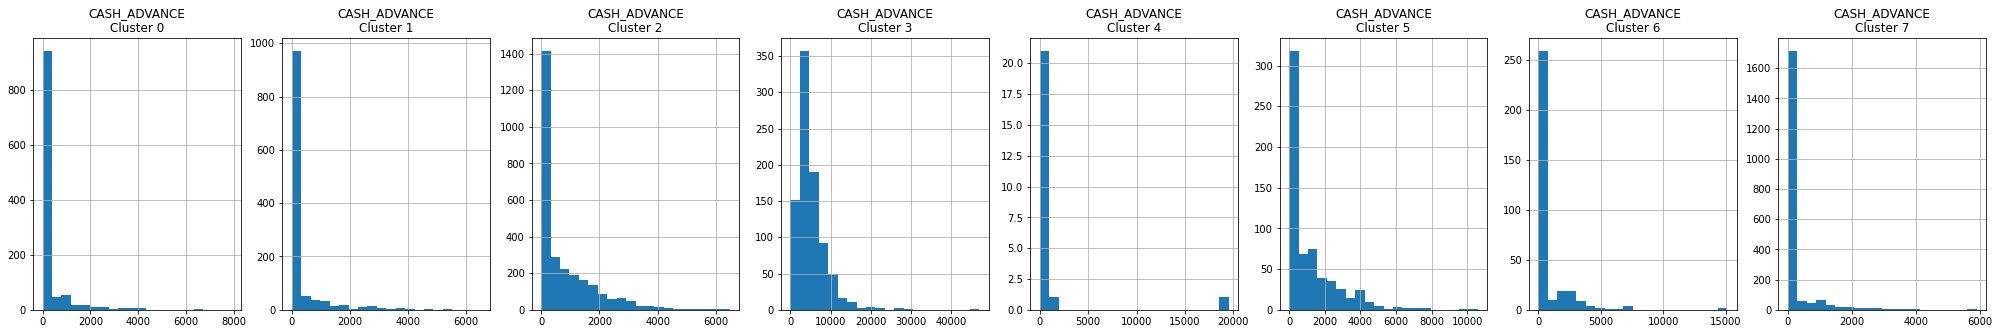

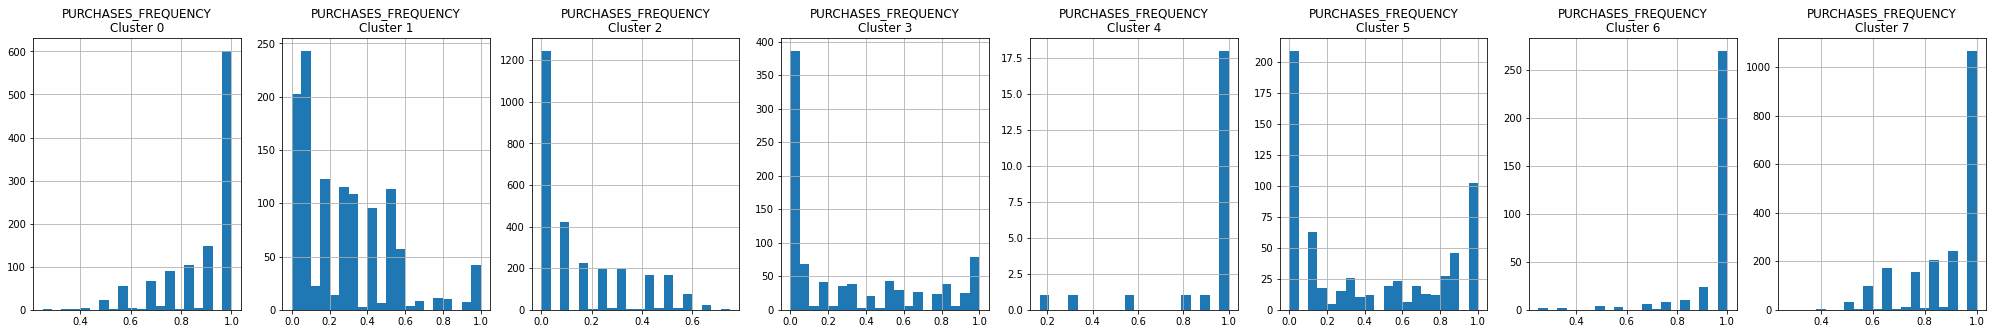

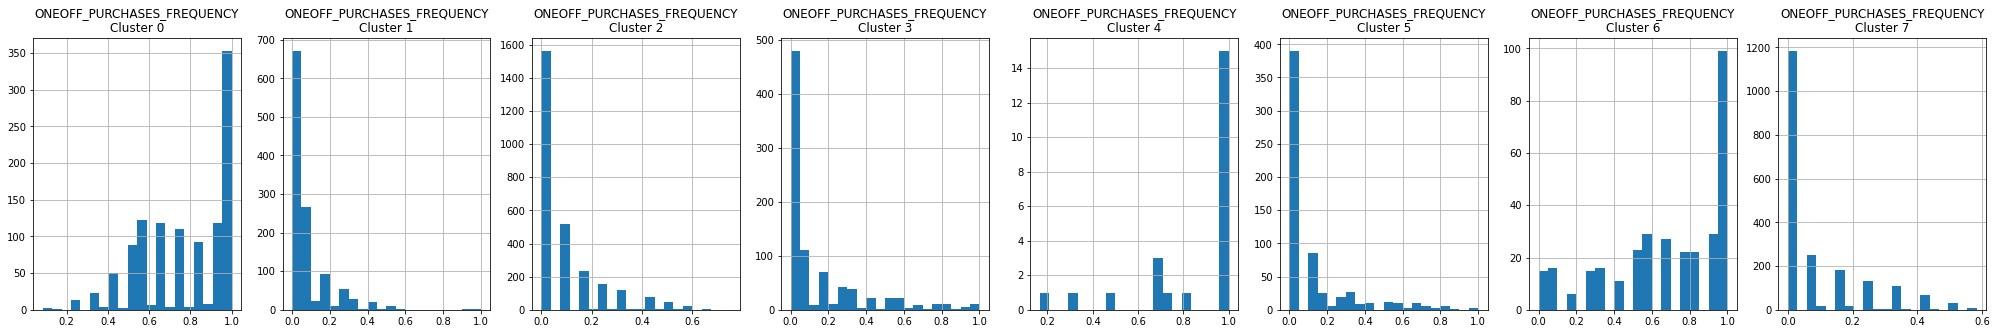

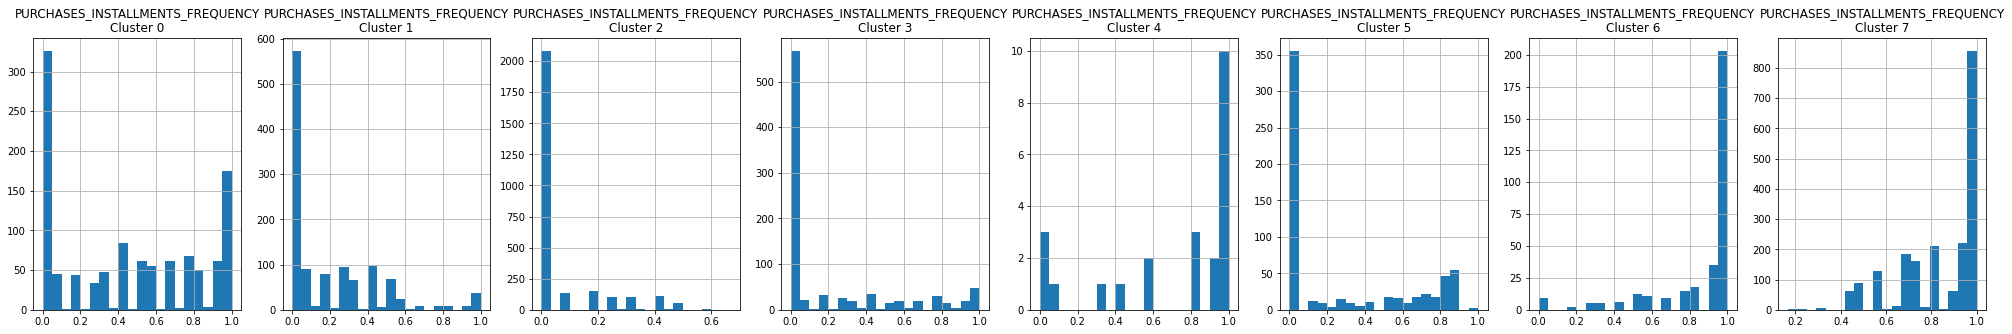

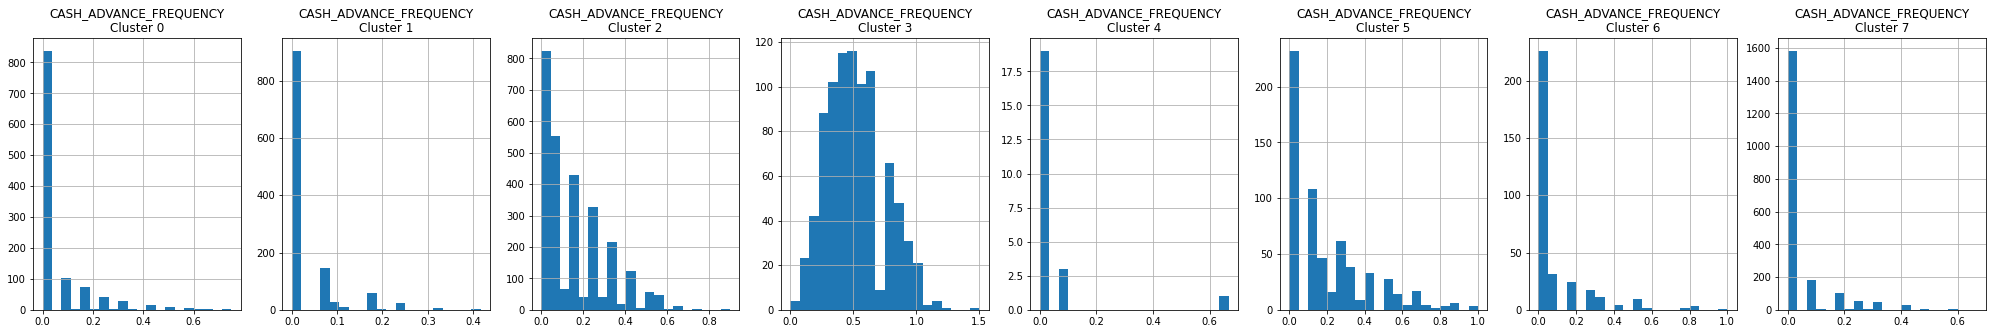

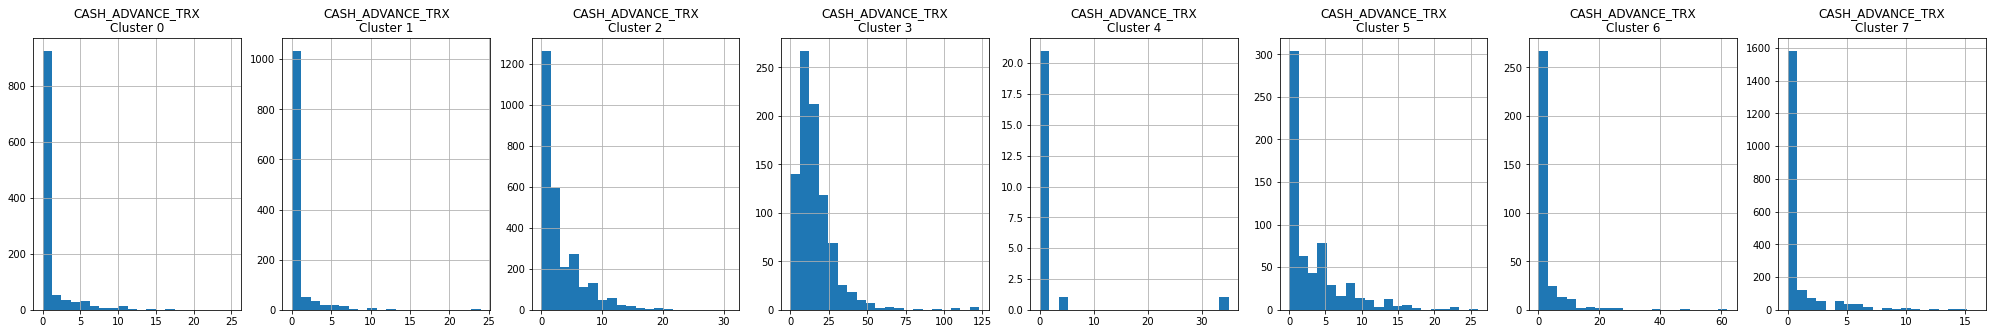

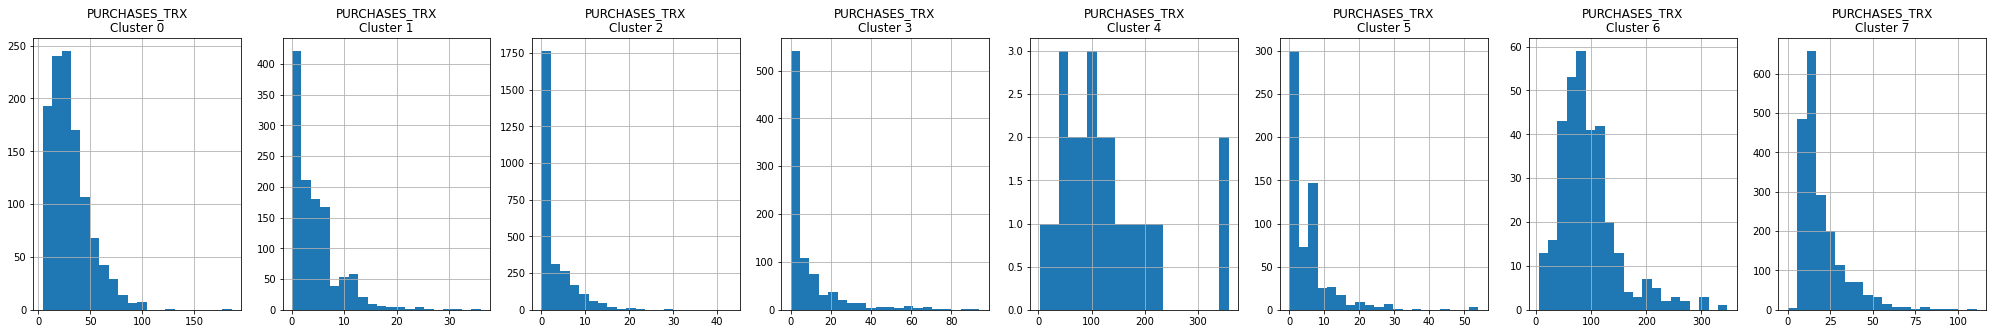

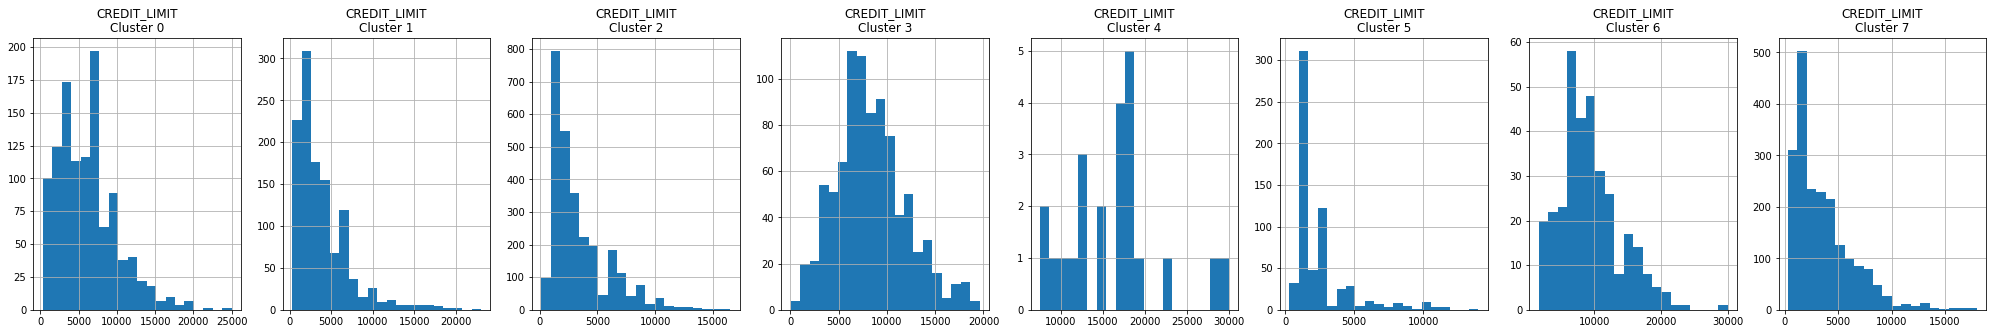

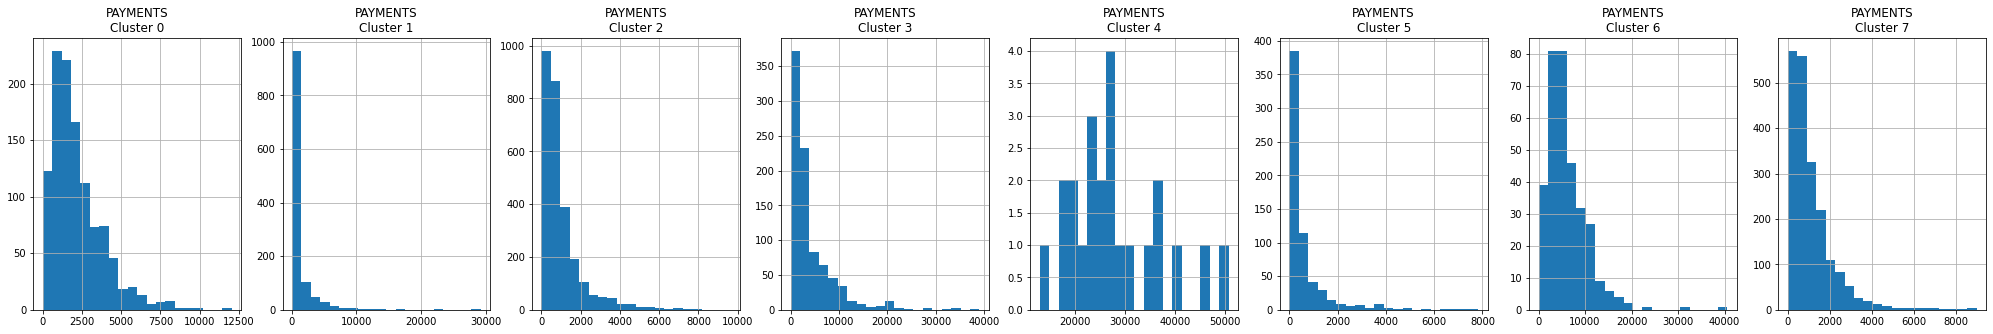

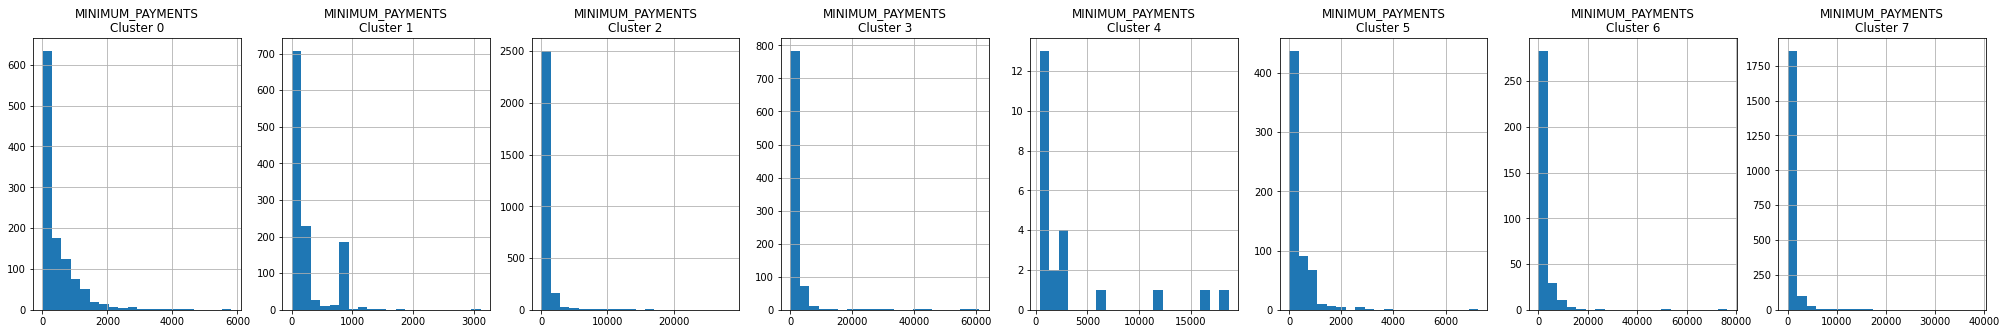

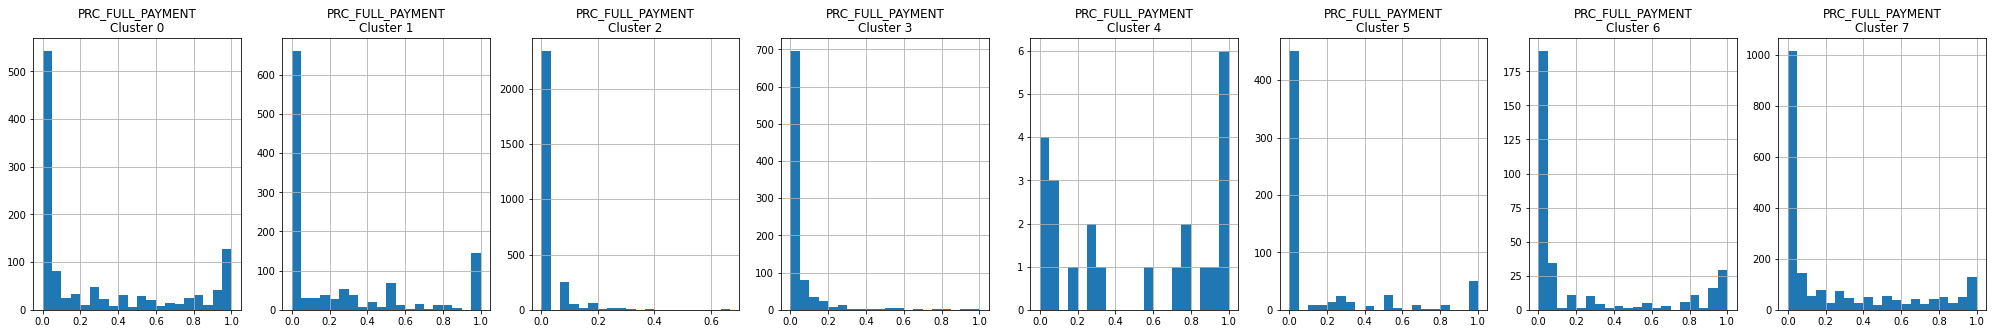

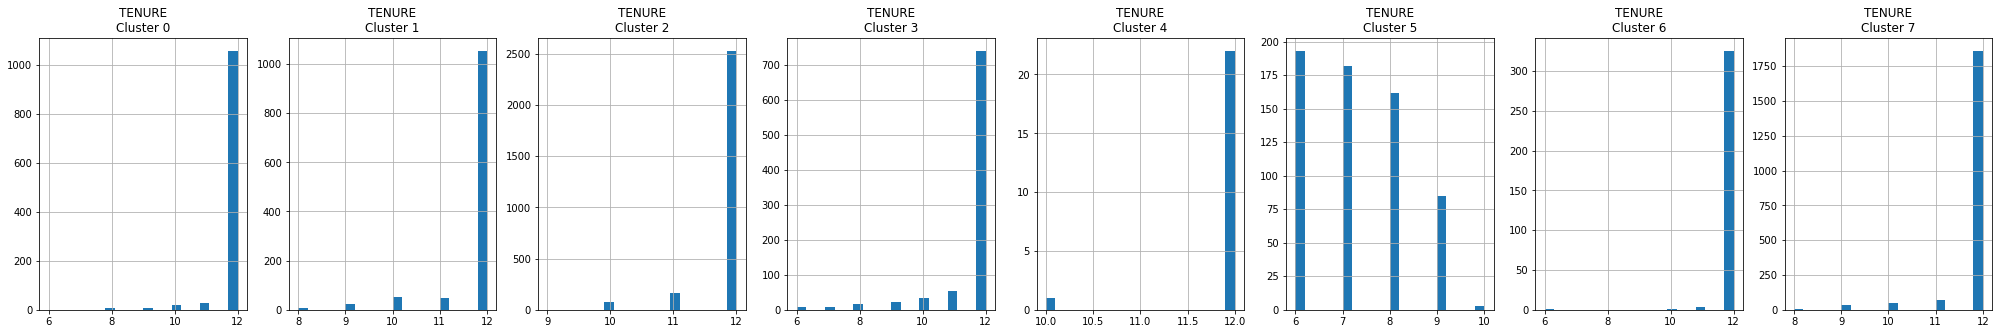

In [35]:
for i in cartaocredito.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j +1)
    cluster= cartaocreditocluster[cartaocreditocluster['CLUSTER']== j]
    cluster[i].hist(bins=20)
    plt.title('{}\nCluster {}'. format(i, j))
  plt.show()
    

In [36]:
creditoordem= cartaocreditocluster.sort_values(by= 'CLUSTER')
creditoordem.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
6297,157.364234,1.000000,1778.92,1233.87,545.05,0.0,1.000000,1.000000,0.500000,0.0,0,36,10500.0,1686.269252,143.010184,0.777778,12,0
1503,3145.204423,1.000000,3613.83,2752.76,861.07,0.0,1.000000,0.416667,0.500000,0.0,0,19,5700.0,1241.075833,1015.020218,0.000000,12,0
4567,39.523885,0.727273,592.88,451.18,141.70,0.0,0.583333,0.583333,0.083333,0.0,0,9,12000.0,1111.148943,120.742325,0.833333,12,0
1498,2619.752921,1.000000,3563.07,2675.63,887.44,0.0,0.916667,0.666667,0.666667,0.0,0,69,4500.0,1227.952887,688.645056,0.000000,12,0
1497,136.743106,1.000000,1466.05,1344.79,121.26,0.0,1.000000,1.000000,0.500000,0.0,0,21,6000.0,1519.011448,191.955443,1.000000,12,0


In [37]:
creditoordem.to_csv('cluster.csv')

## **Aplicação de PCA (Principal component analysis) e visualização dos resultados**

*O PCA é um algoritmo utlizado para redução de dimensionalidade, que ajuda a visualização os grupos em um gráfico, é realizado um calculo para reduzir a dimensão dos dados, por exemplo, se há 2 atributos que se correlacionam, ele tornará os 2 em 1 atributo apenas, mantendo suas caracaterísticas.*

---



In [38]:
pca= PCA(n_components=2)
principalcomp= pca.fit_transform(cartaocreditoescala)
principalcomp

array([[-1.68222032, -1.07645157],
       [-1.13830062,  2.50648202],
       [ 0.96967719, -0.3835219 ],
       ...,
       [-0.92620053, -1.81078935],
       [-2.33654349, -0.6579684 ],
       [-0.55641923, -0.40046417]])

In [39]:
pca_df= pd.DataFrame(data= principalcomp, columns= ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138301,2.506482
2,0.969677,-0.383522
3,-0.873634,0.043167
4,-1.599431,-0.688583


In [40]:
pca_df= pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis =1)
pca_df.head()


,pca1,pca2,CLUSTER
0,-1.682220,-1.076452,2
1,-1.138301,2.506482,3
2,0.969677,-0.383522,0
3,-0.873634,0.043167,2
4,-1.599431,-0.688583,2


*Fizemos a redução da dimensão dos dados através do algorítmo PCA, criamos um novo Data Frame com estes dois componentes (pca1 e pca2), depois criamos outro Data Frame concatenando a coluna CLUSTERS. Por fim, visualizamos através de gráfico cada grupo, separados por cores.*

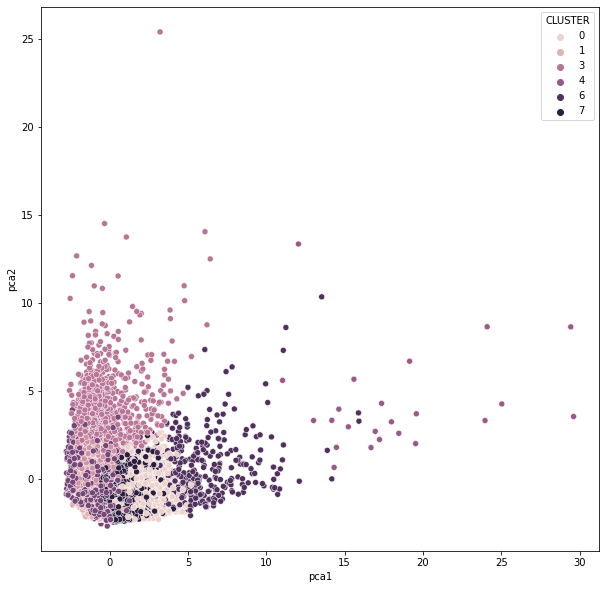

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df)

# **Aplicação de autoencoders**

*Neste caso iremos iniciar aplicando o autoencoders reduzindo a dimensão dos dados, depois iremos encontrar o número de clusters, faremos aplicação do k_means, e por fim utilizaremos o PCA.* 

In [42]:
cartaocreditoescala.shape

(8950, 17)

In [43]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model

In [44]:
input_df= Input (shape= (17,))
x= Dense(500, activation='relu')(input_df)
x= Dense(2000, activation= 'relu')(x)

encoded= Dense(10, activation='relu')(x)

x= Dense(2000, activation='relu')(encoded)
x= Dense(500, activation= 'relu')(x)

decoded= Dense(17)(x)

In [45]:
autoencoder= Model(input_df, decoded)


In [46]:
encoder= Model(input_df, encoded)

In [47]:
autoencoder.compile(optimizer= 'Adam',loss= 'mean_squared_error' )

In [48]:
autoencoder.fit(cartaocreditoescala, cartaocreditoescala, epochs=50)

Epoch 1/50
280/280 [==============================] - 8s 26ms/step - loss: 0.1907
Epoch 2/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0730
Epoch 3/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0586
Epoch 4/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0550
Epoch 5/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0489
Epoch 6/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0352
Epoch 7/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0494
Epoch 8/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0417
Epoch 9/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0503
Epoch 10/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0397
Epoch 11/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0366
Epoch 12/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0378
Epoch 13/50
2

In [49]:
cartaocreditoescala.shape

(8950, 17)

In [50]:
compact= encoder.predict(cartaocreditoescala)

In [51]:
compact.shape

(8950, 10)

In [52]:
cartaocreditoescala[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [53]:
compact[0]

array([0.28177837, 0.91621846, 0.0677444 , 0.        , 0.67013776,
       0.        , 0.360263  , 0.        , 0.05065548, 0.6460025 ],
      dtype=float32)

In [54]:
wcss_2=[]
range_values= range(1,20)
for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

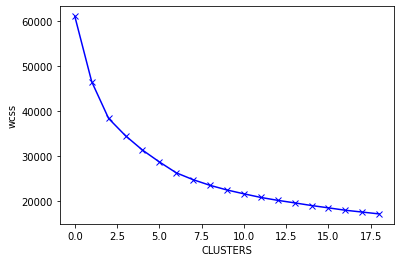

In [55]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('CLUSTERS')
plt.ylabel('wcss');

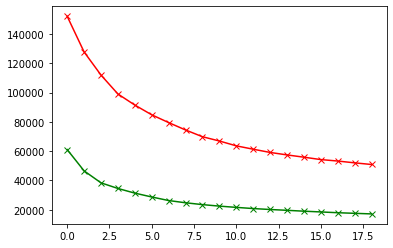

In [56]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g');

*Fazemos o agrupamento com nossa base de dados compactada, e definimos os clusters, da mesma maneira que fizemos anteriormente para redução com PCA, quando comparamos o gráfico do wcss_2 com o wcss_1, vemos q o 2 está bem mais linear, ou seja, lá pelo 4º cluster já apresenta diminuição da variação, assim compreendemos que o fato de reduzir a dimensão dos dados de 17 atributos para 10, ajudou na diminuição dos grupos. *

In [57]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(compact)
labels= kmeans.labels_
labels, labels.shape

(array([0, 1, 0, ..., 2, 2, 2], dtype=int32), (8950,))

In [58]:
df_cluster_at= pd.concat([cartaocredito, pd.DataFrame({'CLUSTER': labels})], axis=1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [59]:
pca= PCA(n_components=2)
princomp= pca.fit_transform(compact)
pca_df= pd.DataFrame(data= princomp, columns= ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.311796,-0.106432
1,0.745304,1.273063
2,-1.065062,-0.393626
3,-0.814801,-0.227998
4,-1.450905,-0.076847


In [60]:
pca_df= pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis=1)
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.311796,-0.106432,0
1,0.745304,1.273063,1
2,-1.065062,-0.393626,0
3,-0.814801,-0.227998,0
4,-1.450905,-0.076847,0


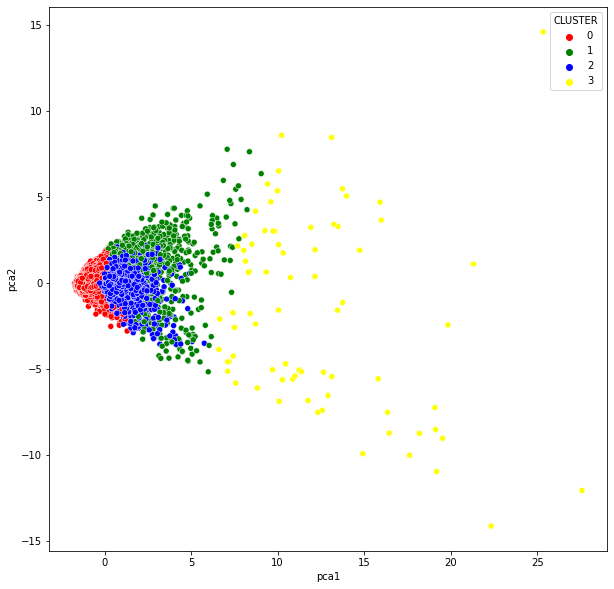

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df, palette = ['red', 'green', 'blue', 'yellow'])

*No gráfico acima, se compararmos ao gráfico anterior(utilizando PCA), vemos que os grupos estão bem mais separados.*

In [62]:
creditoordem2= df_cluster_at.sort_values(by= 'CLUSTER')
creditoordem2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
5267,128.365782,1.000000,1003.20,816.07,187.13,0.000000,1.000000,0.916667,0.416667,0.000000,0,27,7000.0,1057.647019,203.927038,0.750000,12,0
5266,660.468854,1.000000,0.00,0.00,0.00,1334.235174,0.000000,0.000000,0.000000,0.583333,8,0,1700.0,205.396282,195.799861,0.000000,12,0
5265,291.598301,0.454545,0.00,0.00,0.00,1118.361104,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,1174.005094,85.227184,0.083333,12,0
5263,801.703734,1.000000,387.77,0.00,387.77,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,2500.0,1480.676383,1246.237666,0.000000,12,0


In [63]:
creditoordem2.to_excel('Clusterordem.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


*Utilizamos 4 clusters, fizemos o kmeans para este numero, dividindo em 4 grupos, concatenamos a coluna cluster no data frame, utilizamos o PCA para dividir em 2 componentes. Caso precisemos enviar para o departamento de marketing, vamos ordenar os dados por ordem de cluster, e geramos uma arquivo em excel. Assim  a equipe pegará esta planilha e gerará as campanhas de marketing para cada um dos grupos*.

